In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Neural Networks Learning with Scikit-Learn

`scikit-learn` is a large, well-documented and widely used library for machine learning. It contains aslo a support for neural networks. Namely two classes 
* `MLPClassifier` is a class implementing classifiers based on multi-layered neural networks, and 
* `MLPRegressor` is a class implementing regressing (i.e., approximating functions) with multilayered neural networks.

## MLPRegressor 

is an estimator available as a part of the neural_network module of `sklearn` for performing regression tasks using a multi-layer perceptron.

Let us start with a simple example in that we will train a neural network to compute an approximation of the function 
$$2 sin(3x+1)+3$$ on the interval $\langle -3, 5 \rangle$.

### Preparing Data
At first we will prepare a training and testing set.

In [ ]:
X = np.arange(-3, 5, 0.2).reshape(-1,1)
y = 2 * np.sin(3 * X + 1) + 3
print("X:",X)
print("y:",y)

Note that we reshape the 1D vector `np.arange(-3, 5, 0.2)` into a 2D array, where each row is an input pattern. `MLPRegressor` expects that both inputs and outputs are 2D arrays.

We can split manually `X` and `y` into a training and test sets, but there is a function `train_test_split` that does this for us.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n = 4
print(f"The first {n} inputs:")
print(X_test[:n])
print(f"The corresponding {n} labels:")
print(y_test[:n])

Using parameter `random_state=42` we can repeat exactly the same splitting arbitrarily.

### Training `MLPRegressor`

Class MLPRegressor implements a multi-layer perceptron (MLP) that trains using backpropagation with identity a the activation function in the output layer. Hence, the output neurons just output their potentials. In this way, such network can output any real value. The error function used by the network is the mean squared error.

MLPRegressor also supports regression with multi-dimensional outputs -  the desired output can be a vector.

In [4]:
from sklearn.neural_network import MLPRegressor

mlp_regressor  = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, y_train)

C:\Users\mraz\.conda\envs\SNA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mraz\.conda\envs\SNA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(random_state=123)

Now we can use the learned network to compute the approximation for the test samples.

In [5]:
y_preds = mlp_regressor.predict(X_test)

print(y_preds[:10])
print(y_test[:10])

print('Test R^2 Score : %.3f'%mlp_regressor.score(X_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training R^2 Score : %.3f'%mlp_regressor.score(X_train, y_train))

[1.75257859 1.67232722 1.69045494 2.32241619 2.81909897 1.83633411
 3.70868981 2.44840648]
[[2.4889178 ]
 [4.99914721]
 [4.68294197]
 [4.93583934]
 [4.26253328]
 [1.56528782]
 [4.99605331]
 [4.88146111]]
Test R^2 Score : -2.017
Training R^2 Score : -0.170


We can see that the network did not learn the function. In the documentation for `MLPRegressor` we can see that this regressor has many parameter with some default values. 

Let us try 500 iteration instead of the default 200, less hidden neurons - 10 instead of 100 in one hidden layer, sigmoid activation function (`'logistic'`) instead of the default `'relu'` and the learning algorithm `'lgfgs'` that is a variant of Newton's method with a limited memory.

In [82]:
mlp_regressor  = MLPRegressor(random_state=123, 
                              hidden_layer_sizes=[10], 
                              max_iter=500, 
                              activation='logistic',
                              solver='lbfgs')
mlp_regressor.fit(X_train, y_train.ravel())

MLPRegressor(activation='logistic', hidden_layer_sizes=[10], max_iter=500,
             random_state=123, solver='lbfgs')

In [83]:
print('Test R^2 Score : %.3f'%mlp_regressor.score(X_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training R^2 Score : %.3f'%mlp_regressor.score(X_train, y_train))

Test R^2 Score : 0.850
Training R^2 Score : 0.989


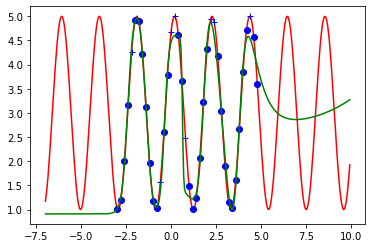

In [74]:
XX = np.arange(-7, 10, 0.05).reshape(-1, 1)
plt.plot(XX, 2 * np.sin(3 * XX + 1) + 3, 'r')
plt.plot(X_train,y_train,'ob')
plt.plot(X_test, y_test,'+b')
plt.plot(XX, mlp_regressor.predict(XX),'g')


$R^2$ score is called the *coefficient of determination* of the prediction. It is defined as $(1-\frac{u}{v})$, where $u$ is the residual sum of squares `((y_true - y_pred) ** 2).sum()` and $v$ is the total sum of squares `((y_true - y_true.mean()) ** 2).sum()`. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). What is the range for $R^2$?

In [127]:
from sklearn.metrics import mean_squared_error

print("Train set MSE:", mean_squared_error(y_train, mlp_regressor.predict(X_train)))
print("Test set MSE:", mean_squared_error(y_test, mlp_regressor.predict(X_test)))

mlp_regressor.coefs_[0]

Train set MSE: 1.770997252629857
Test set MSE: 3.2829307025348506


array([[ 0.14860237,  0.11104248, -0.58366439,  0.16846209,  0.14241971,
         0.01003868,  0.19115032,  0.14790237,  0.0409317 ,  0.10875516]])

Implement the following function that plots the evolution of MSE.

**Note:** You can switch-off warnings using

    import warnings
    warnings.filterwarnings("ignore")


In [180]:
def monitor_MSE(regressor, X_train, X_test, y_train, y_test, iter_step=50):
    # Fit the regressor regressor using traing set X_train with
    # the desired outputs y_train, after each iter_step iterations compute
    # MSE for the training and test sets.
    # At the end plot the evolution of MSE on both train and test sets.
    import warnings
    warnings.filterwarnings("ignore")
    
    max_iter = regressor.max_iter
    regressor.set_params(max_iter=iter_step, warm_start=True)
...
    
    plt.yscale('log')
    plt.plot(range(0,max_iter,iter_step), MSE_train, 'b')
    plt.plot(range(0,max_iter,iter_step), MSE_test, 'r')
    return regressor

In [ ]:
mlp_regressor  = MLPRegressor(random_state=123, 
                              hidden_layer_sizes=[10], 
                              max_iter=50, 
                              activation='logistic',
                              solver='lbfgs',
                              early_stopping=True)
mlp_regressor = mlp_regressor.fit(X_train, y_train.ravel())

print('Test R^2 Score : %.3f'%mlp_regressor.score(X_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training R^2 Score : %.3f'%mlp_regressor.score(X_train, y_train))

print("Train set MSE:", mean_squared_error(y_train.ravel(), mlp_regressor.predict(X_train)))
print("Test set MSE:", mean_squared_error(y_test.ravel(), mlp_regressor.predict(X_test)))

print(mlp_regressor.coefs_[0])


In [ ]:
mlp_regressor  = MLPRegressor(random_state=123, 
                              hidden_layer_sizes=[10], 
                              max_iter=50, 
                              activation='logistic',
                              solver='lbfgs',
                              warm_start=True)
mlp_regressor = monitor_MSE(mlp_regressor, X_train, X_test, y_train.ravel(), y_test.ravel(), iter_step=10)

print('Test R^2 Score : %.3f'%mlp_regressor.score(X_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training R^2 Score : %.3f'%mlp_regressor.score(X_train, y_train))

print("Train set MSE:", mean_squared_error(y_train, mlp_regressor.predict(X_train)))
print("Test set MSE:", mean_squared_error(y_test, mlp_regressor.predict(X_test)))

mlp_regressor.coefs_[0]

Implement the following function that performs so called regression analysis of the trained regressor.  

In [191]:
def regression_analysis(regressor, X_train, X_test, y_train, y_test):
    # plot two plots: regressor predictions (y-axis) for the train 
    # set X_train against y_train (x-axis)
    # and regressor predictions (y-axis) for the test 
    # set X_test against y_test (x-axis)
    pass


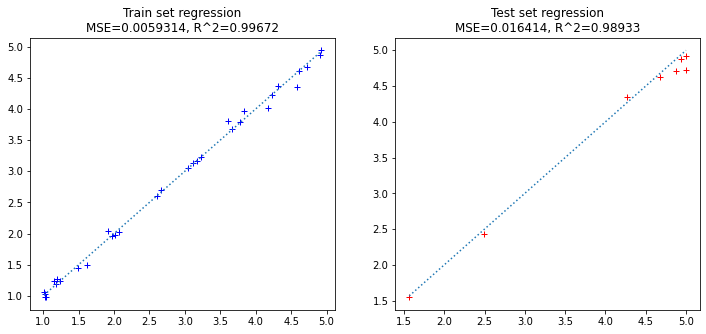

In [192]:
regression_analysis(mlp_regressor, X_train, X_test, y_train.ravel(), y_test.ravel())

## The Main Attributes of `MLPClassifier`

* `loss_` is the loss after training,
* `n_layers_` is the number of layers of the network,
* `coefs_` is a list of arrays of length `n_layers - 1`; $i$-th array is the weight matrix of layer $i$,
* `intercepts_` is a list of arrays of length `n_layers - 1`; $i$-th array is the bias vector associated with layer $i$, 
* `n_iter_` is the number of iterations the solver run,
* `out_activation_` is the name of the output layer activation function.

In [193]:
print("Loss : ", mlp_regressor.loss_)

Loss :  0.004895738291749025


In [198]:
print("Number of Coefs : ", len(mlp_regressor.coefs_))

[weights.shape for weights in mlp_regressor.coefs_]

Number of Coefs :  2


[(1, 10), (10, 1)]

In [199]:
print("Number of Intercepts : ", len(mlp_regressor.intercepts_))

[intercept.shape for intercept in mlp_regressor.intercepts_]

Number of Intercepts :  2


[(10,), (1,)]

In [207]:
print("Number of Iterations for Which Estimator Ran : ", mlp_regressor.n_iter_)

Number of Iterations for Which Estimator Ran :  1968


In [201]:
print("Name of Output Layer Activation Function : ", mlp_regressor.out_activation_)

Name of Output Layer Activation Function :  identity


Improve the results of the regressor!